In [0]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13100 (delta 2), reused 7 (delta 2), pack-reused 13090
Receiving objects: 100% (13100/13100), 11.88 MiB | 6.68 MiB/s, done.
Resolving deltas: 100% (8948/8948), done.


In [0]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [0]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variabl

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'
'GEM Net'
 gemorg
 gemorg_last.weights
 Ndback
 orgbackup
'www.TamilRockers.li - Rangasthalam (2018)[Telugu Proper - HDRip - x264 - 400MB - ESubs].mkv'


In [0]:
%cd ..

/content


In [0]:
!cp "/mydrive/orgbackup/VOCtest_06-Nov-2007.tar" "/content/darknet/VOCtest_06-Nov-2007.tar"

In [0]:
!cp "/mydrive/orgbackup/VOCtrainval_11-May-2012.tar" "/content/darknet/VOCtrainval_11-May-2012.tar"

In [0]:
!cp "/mydrive/orgbackup/VOCtrainval_06-Nov-2007.tar" "/content/darknet/VOCtrainval_06-Nov-2007.tar"

In [0]:
!cp "/mydrive/orgbackup/densenet201.weights" "/content/darknet/densenet201.weights"

In [0]:
!cp "/mydrive/orgbackup/voc.names" "/content/darknet/data/voc.names"

In [0]:
!cp "/mydrive/orgbackup/voc.data" "/content/darknet/cfg/voc.data"

In [0]:
!cp "/mydrive/orgbackup/gemorg.cfg" "/content/darknet/cfg/gemorg.cfg"

In [0]:
!cp "/mydrive/orgbackup/detector.c" "/content/darknet/src/detector.c"

In [0]:
!cp "/mydrive/orgbackup/voc_label.py" "/content/darknet/voc_label.py"

In [0]:
!cp "/mydrive/gemorg/gemorg_4000.weights" "/content/darknet/backup/gemorg_4000.weights"

In [0]:
!ls

darknet  drive	sample_data


In [0]:
%cd darknet

/content/darknet


In [0]:
!tar xf VOCtrainval_11-May-2012.tar


In [0]:
!tar xf VOCtrainval_06-Nov-2007.tar

In [0]:
!tar xf VOCtest_06-Nov-2007.tar

In [0]:
!python voc_label.py

In [0]:
!cat 2007_train.txt 2007_val.txt 2012_*.txt > train.txt

In [0]:
!./darknet partial cfg/densenet201.cfg densenet201.weights extraction.conv.weights 121

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 GPU isn't used 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     64       7 x 7/ 2    256 x 256 x   3 ->  128 x 128 x  64 0.308 BF
   1 max                2x 2/ 2    128 x 128 x  64 ->   64 x  64 x  64 0.001 BF
   2 conv    128       1 x 1/ 1     64 x  64 x  64 ->   64 x  64 x 128 0.067 BF
   3 conv     32       3 x 3/ 1     64 x  64 x 128 ->   64 x  64 x  32 0.302 BF
   4 route  3 1 	                           ->   64 x  64 x  96 
   5 conv    128       1 x 1/ 1     64 x  64 x  96 ->   64 x  64 x 128 0.101 BF
   6 conv     32       3 x 3/ 1     64 x  64 x 128 ->   64 x  64 x  32 0.302 BF
   7 route  6 4 	                           ->   64 x  64 x 128 
   8 conv    128       1 x 1/ 1     64 x  64 x 128 ->   64 x  64 x 128 0.134 BF
   9 conv     32       3 x 3/ 1     64 x  64 x 128 ->   64 x  6

In [0]:
!./darknet detector train cfg/voc.data cfg/gemorg.cfg  mydrive/backup/gemorg_4000.weights -map -dont_show

CUDA status Error: file: ./src/dark_cuda.c : () : line: 39 : build time: Apr 21 2020 - 07:18:45 

 CUDA Error: no CUDA-capable device is detected
CUDA Error: no CUDA-capable device is detected: Success
darknet: ./src/utils.c:325: error: Assertion `0' failed.


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     64       7 x 7/ 2    416 x 416 x   3 ->  208 x 208 x  64 0.814 BF
   1 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   2 conv    128       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x 128 0.177 BF
   3 conv     32       3 x 3/ 1    104 x 104 x 128 ->  104 x 104 x  32 0.797 BF
   4 route  3 1 	                           ->  104 x 104 x  96 
   5 conv    128       1 x 1/ 1    104 x 104 x  96 ->  104 x 104 x 128 0.266 BF
   6 conv     32       3 x 3/ 1    104 x 104 x 128 ->  104 x 104 x  32 0.797 BF
   7 route  6 4 	                           ->  104 x 104 x 128 
   8 conv    128       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x 128 0.354 BF
   9 conv     32       3 x 3/ 1    10

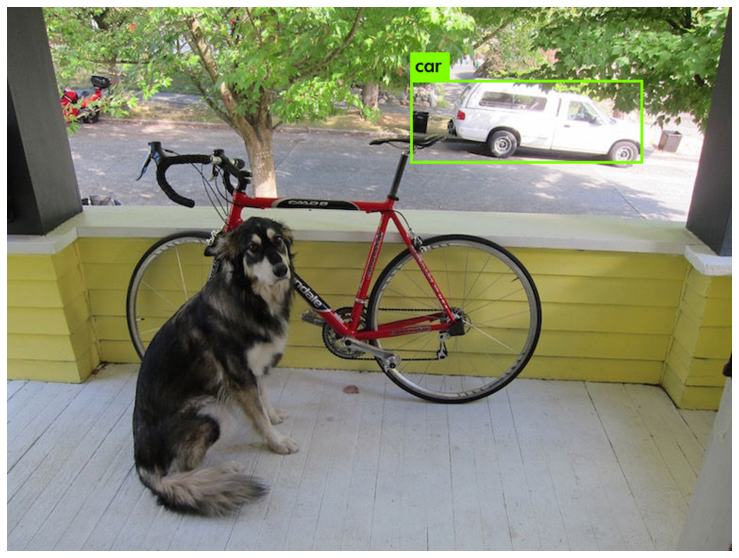

In [0]:
# look we can run another detection!
!./darknet detector test cfg/voc.data cfg/gemorg.cfg backup/gemorg_4000.weights data/dog.jpg
imShow('predictions.jpg')

In [0]:
!./darknet detector map cfg/voc.data cfg/gemorg.cfg backup/gemorg_4000.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 600, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     64       7 x 7/ 2    416 x 416 x   3 ->  208 x 208 x  64 0.814 BF
   1 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   2 conv    128       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x 128 0.177 BF
   3 conv     32       3 x 3/ 1    104 x 104 x 128 ->  104 x 104 x  32 0.797 BF
   4 route  3 1 	                           ->  104 x 104 x  96 
   5 conv    128       1 x 1/ 1    104 x 104 x  96 ->  104 x 104 x 128 0.266 BF
   6 conv     32       3 x 3/ 1    104 x 104 x 128 ->  104 x 104 x  32 0.797 BF
   7 route  6 4 	                           ->  104 x 104 x 128 
   8 conv    128       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x 128 0.354 BF
   9 conv     32       3 x 3/ 1    10

In [0]:
!cp "/content/drive/My Drive/Ndback/gemorg_1000.weights" "/content/darknet/gemorg_1000.weights"

In [0]:
%cd darknet

In [0]:
!mv /content/gemorg.cfg /content/darknet/cfg/gemorg.cfg

In [0]:
!mv /content/voc.names /content/darknet/data/voc.names

In [0]:
!mv /content/voc.data /content/darknet/cfg/voc.data